In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from mopet import mopet

from synchronization import plots
from synchronization import runner
from synchronization import constants

# All-to-all PING model

## Default Parameters

* Drive from E -> I needs to stay so low that I neurons do not burst!


In [141]:
params = {
    "runtime": 500.0,

    "J_itoi": 0.4,
    "J_etoe": 0.01,
    "J_etoi": 0.05,
    "J_itoe": 0.2,

    "J_ppee": 0.001,
    "J_ppei": 0.02,
    
    "p_ppee": 1.0,
    "p_ppei": 1.0,
    "p_ppii": 0.0,
    
    "p_etoi": 1.0,
    "p_etoe": 1.0,
    "p_itoe": 1.0,
    "p_itoi": 1.0,

    "ou_enabled": [False, False],

    "poisson_enabled": [True, True],
    "poisson_variance": 1.0,
    "poisson_p": 0.84,
    "poisson_size": 800,
    "poisson_mean_input": 300,
    
    "N_pop": 2,
    
    "net_record_spikes": 400,
    "poisson_I_ratio": 0.4,
    "poisson_I_enabled": True,
     "const_delay": 0.0,
}

## All-to-all PING model

In [142]:
params_mid = dict(params)
params_mid.update({
    "runtime": 5000,
})

low_strength = runner.run(
    modified_params=params_mid
)

Starting simulation at t=0. s for a duration of 5. s
0.96385 s (19%) simulated in 10s, estimated 42s remaining.
2.0158 s (40%) simulated in 20s, estimated 30s remaining.
3.09965 s (61%) simulated in 30s, estimated 18s remaining.
4.17135 s (83%) simulated in 40s, estimated 8s remaining.
5. s (100%) simulated in 47s


Global Order Parameter value of: 0.5814539257193032
Mean Phase Coherence 0.1982040122161132
Computing within synchronization for network 1 and 2
Within Synchronization of Network 1 0.8535156623986594
Within Synchronization of Network 2 0.8193752999604595


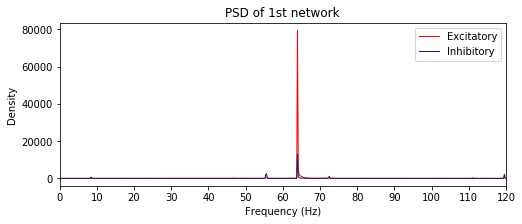

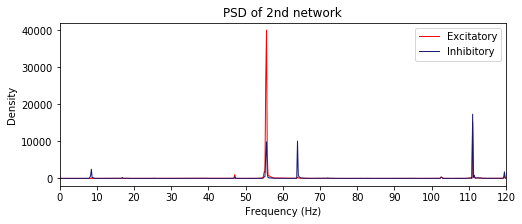

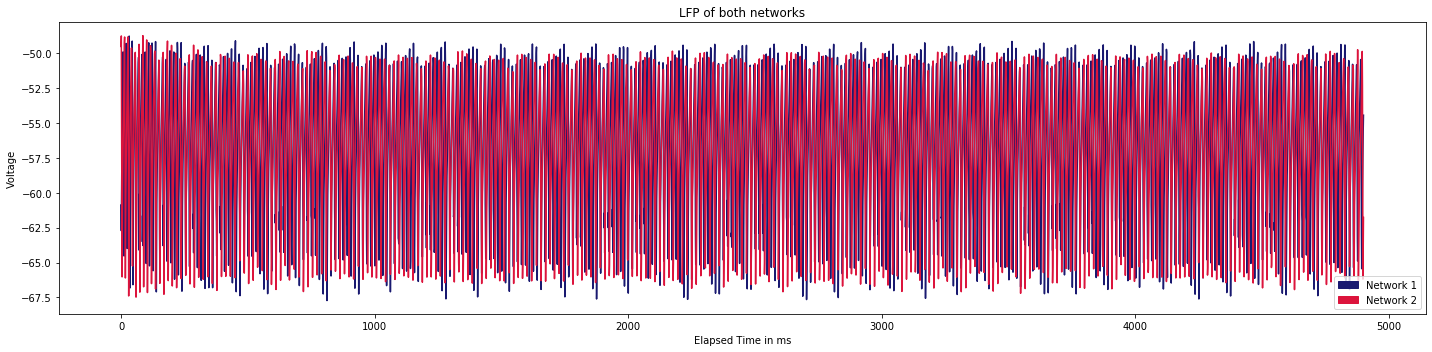

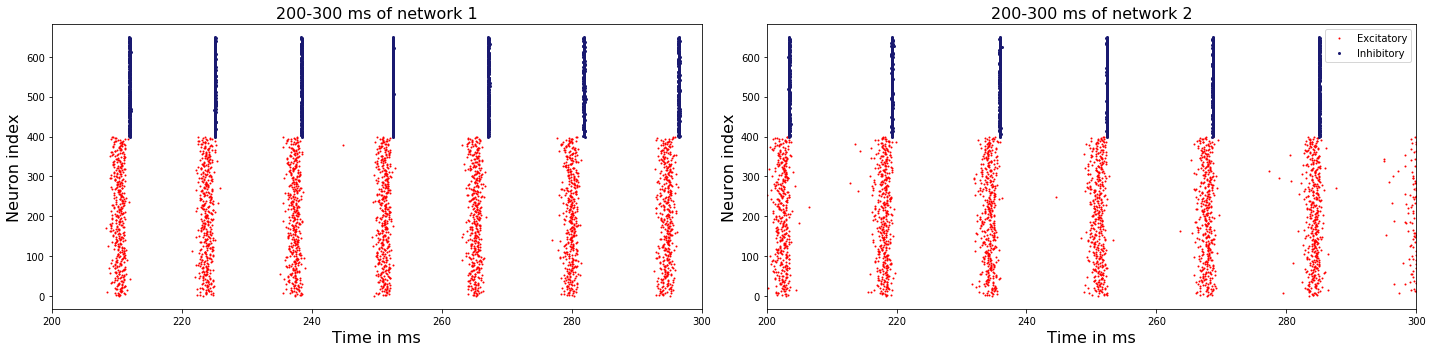

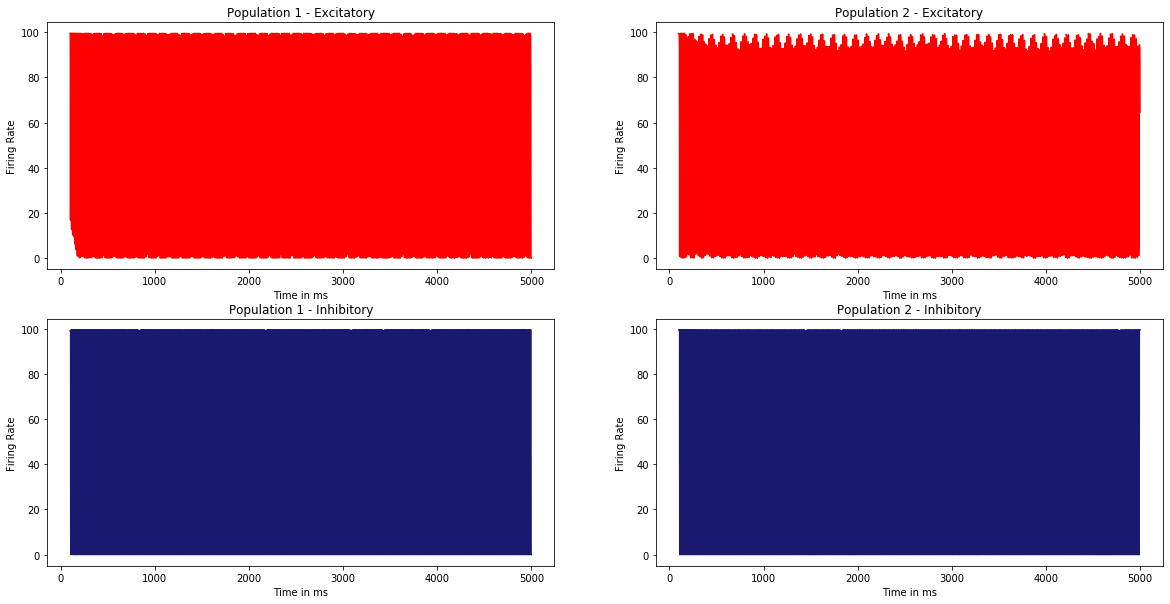

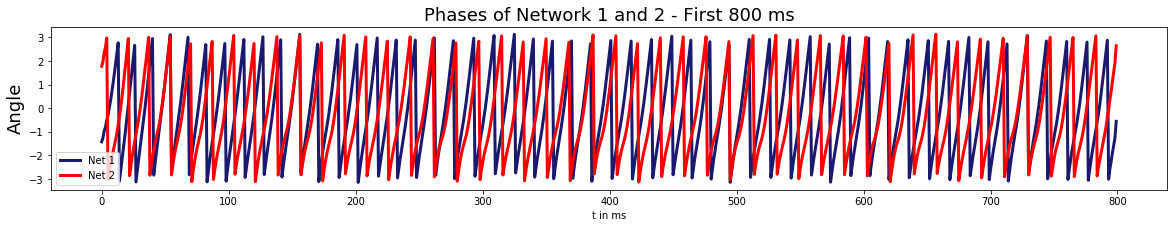

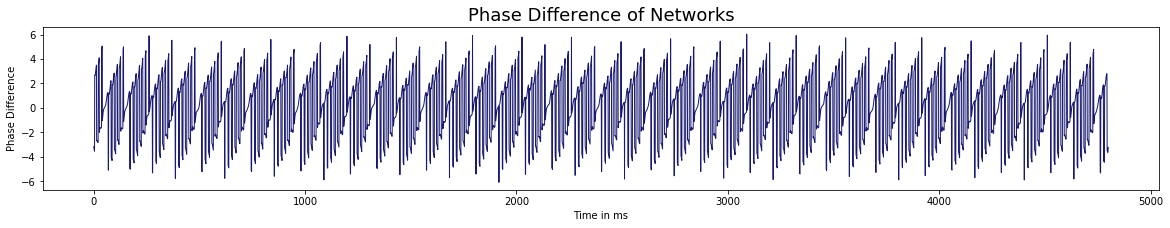

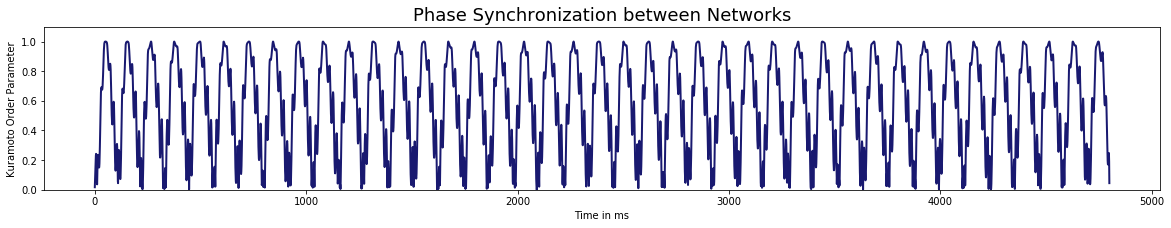

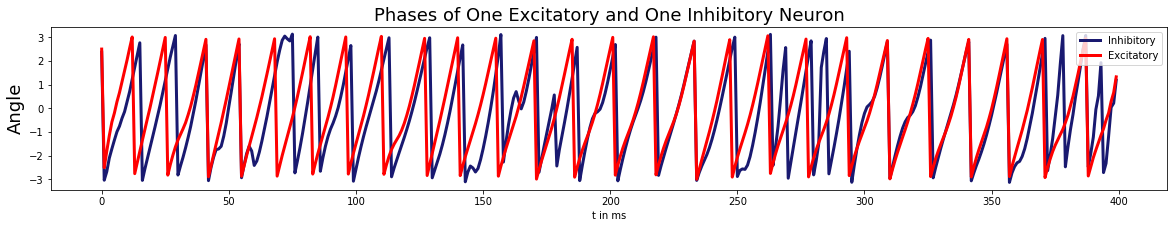

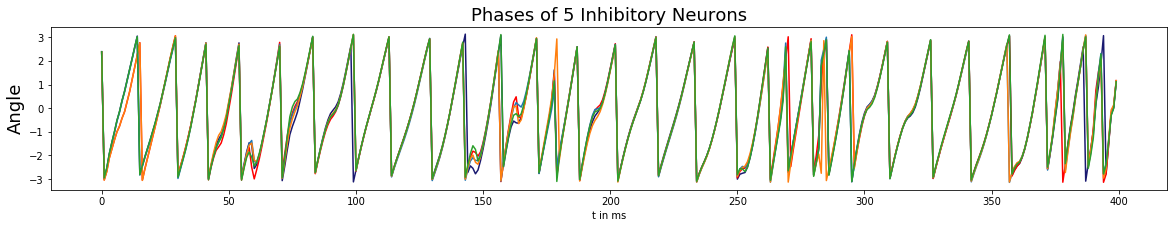

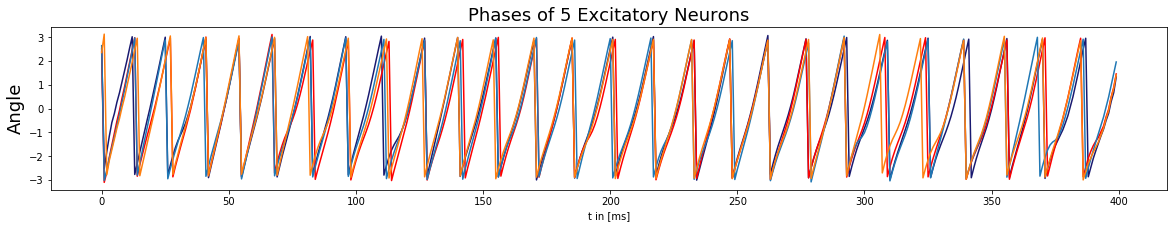

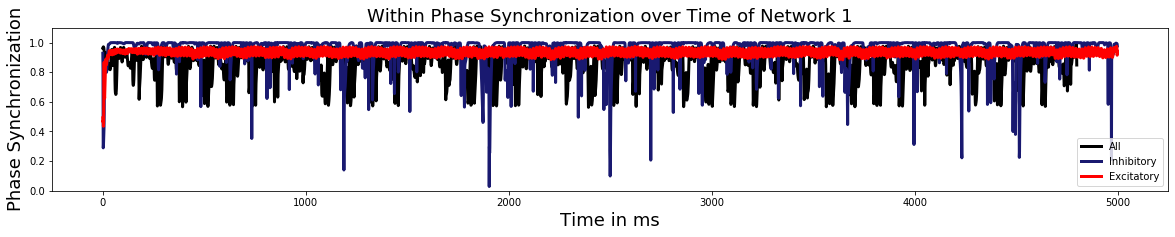

In [143]:
plots.plot_results(low_strength, pop_rates=True, full_raster=False)

## Increase in E to I network coupling strength leads to synchronization 

In [144]:
params_mid = dict(params)
params_mid.update({
    "J_ppee": 0.01,
    "J_ppei": 0.05,
    "runtime": 5000
})

model = runner.run(
    modified_params=params_mid
)

Starting simulation at t=0. s for a duration of 5. s
0.97255 s (19%) simulated in 10s, estimated 41s remaining.
1.9482 s (38%) simulated in 20s, estimated 31s remaining.
2.9137 s (58%) simulated in 30s, estimated 21s remaining.
3.86505 s (77%) simulated in 40s, estimated 12s remaining.
4.8372 s (96%) simulated in 50s, estimated 2s remaining.
5. s (100%) simulated in 51s


Global Order Parameter value of: 0.9724403836675555
Mean Phase Coherence 0.9940812401354169
Computing within synchronization for network 1 and 2
Within Synchronization of Network 1 0.868282224156394
Within Synchronization of Network 2 0.5169275271501976


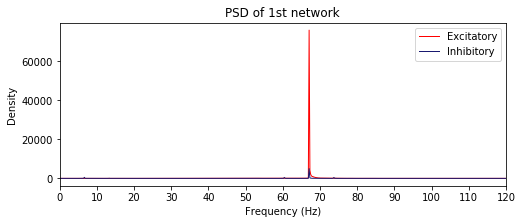

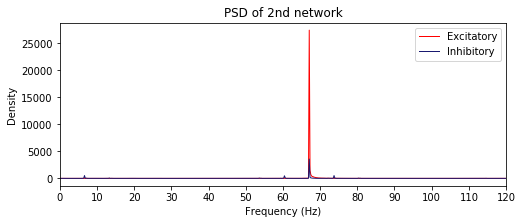

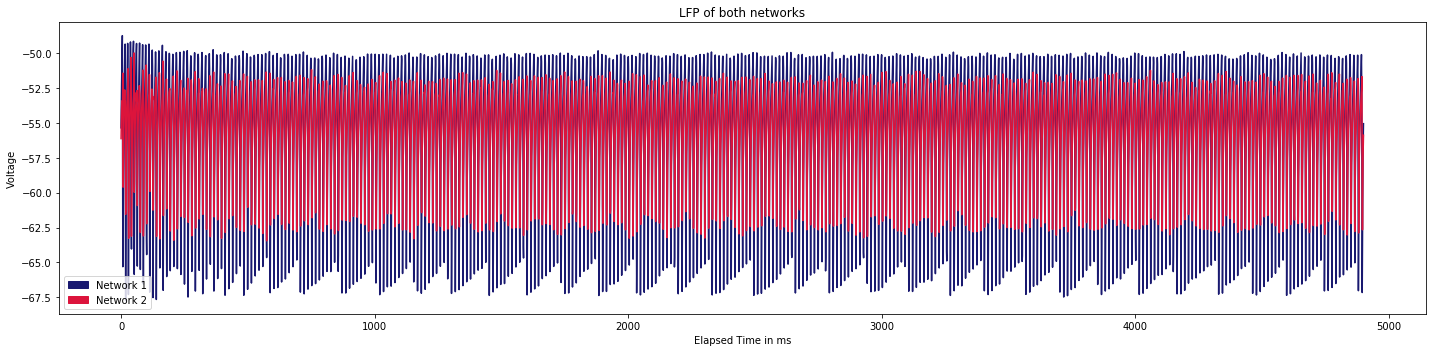

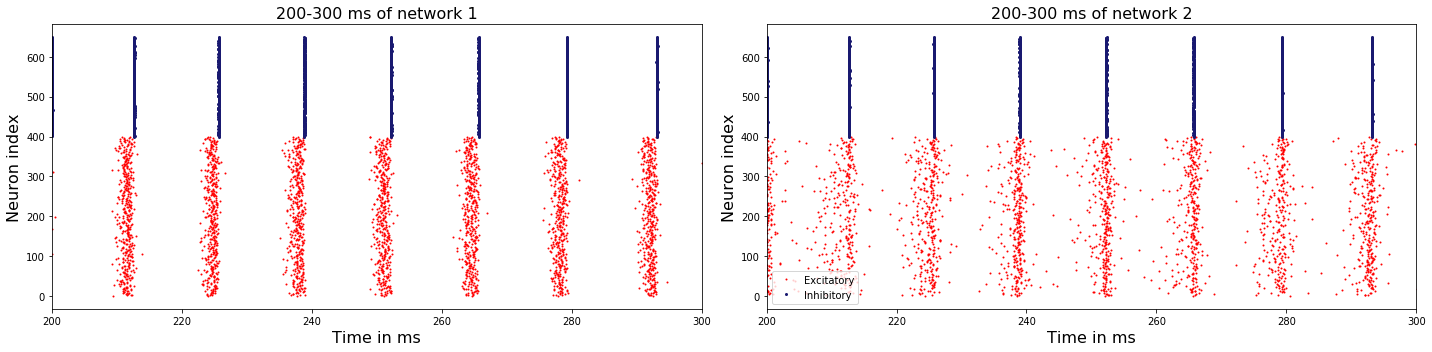

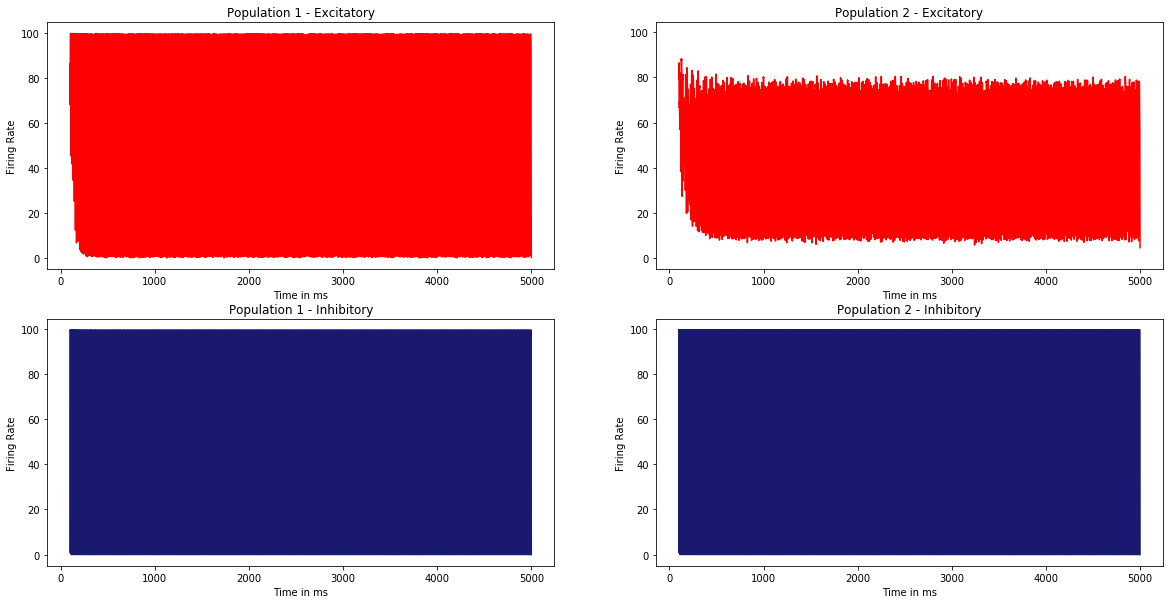

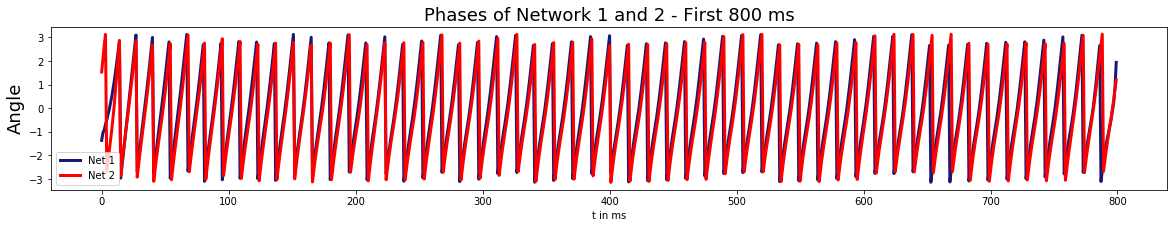

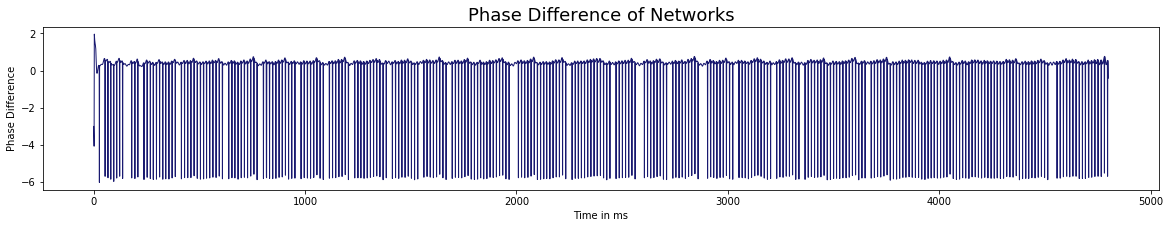

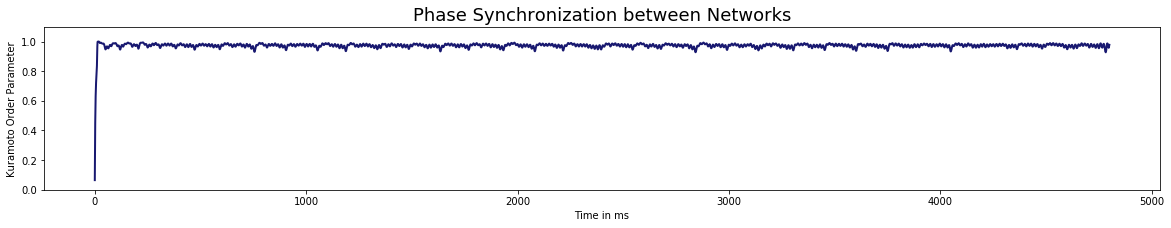

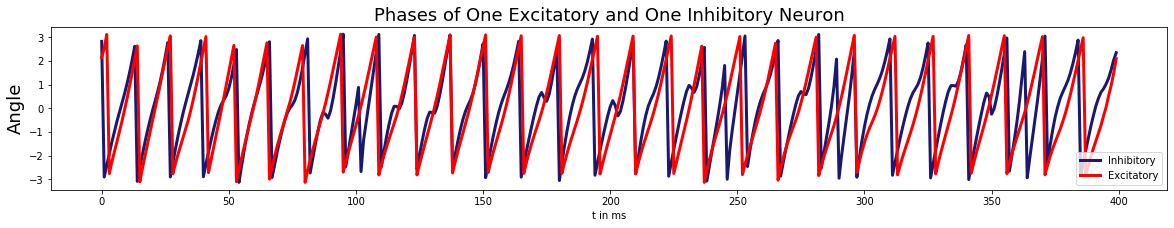

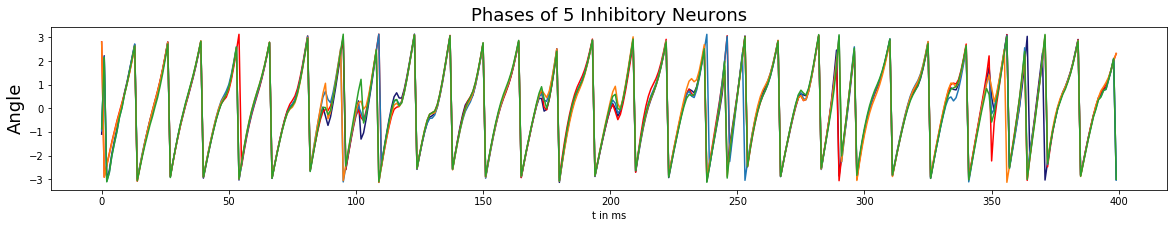

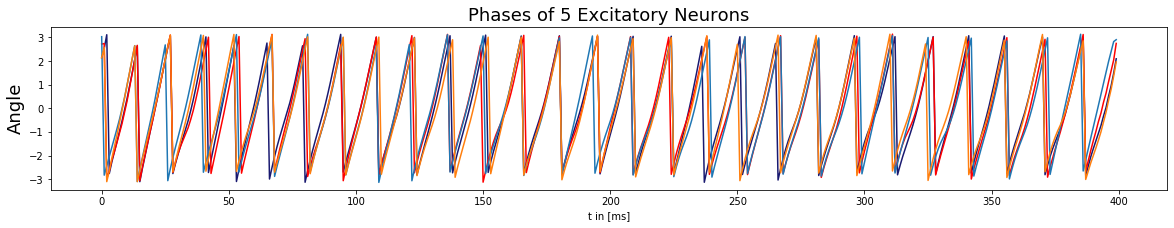

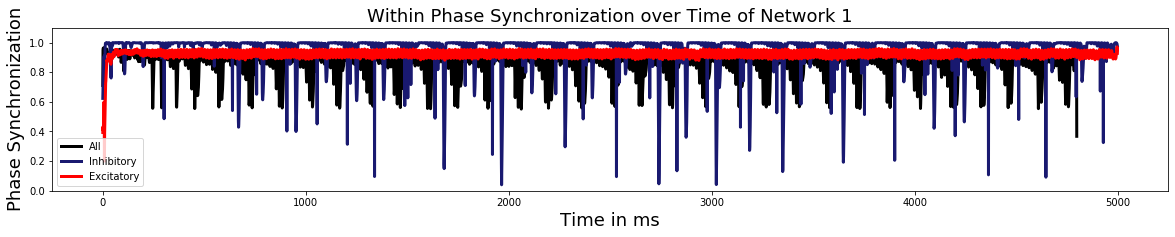

In [145]:
plots.plot_results(model, pop_rates=True, full_raster=False)

## Increase in Noise Strength leads to synchronization

In [146]:
params_mid = dict(params)
params_mid.update({
    "poisson_variance": 8.0,
    "runtime": 5000,
})

model = runner.run(
    modified_params=params_mid
)

Starting simulation at t=0. s for a duration of 5. s
1.1271 s (22%) simulated in 10s, estimated 34s remaining.
2.2352 s (44%) simulated in 20s, estimated 25s remaining.
3.39215 s (67%) simulated in 30s, estimated 14s remaining.
4.55265 s (91%) simulated in 40s, estimated 4s remaining.
5. s (100%) simulated in 43s


Global Order Parameter value of: 0.8422504267029253
Mean Phase Coherence 0.8829798531064984
Computing within synchronization for network 1 and 2
Within Synchronization of Network 1 0.4105469939465534
Within Synchronization of Network 2 0.31252319363685177


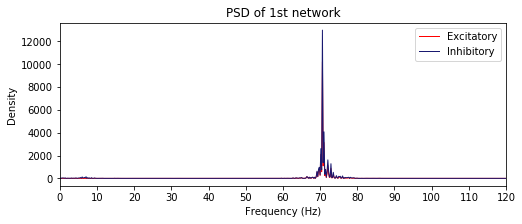

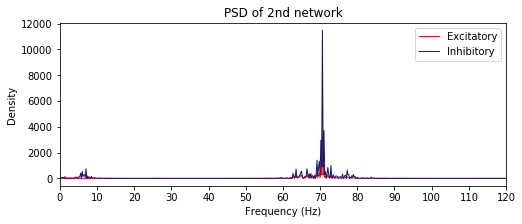

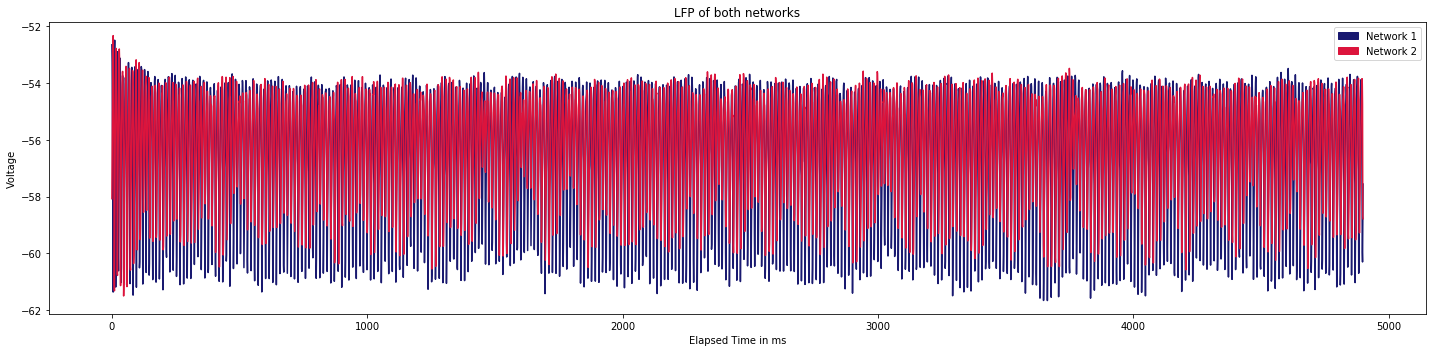

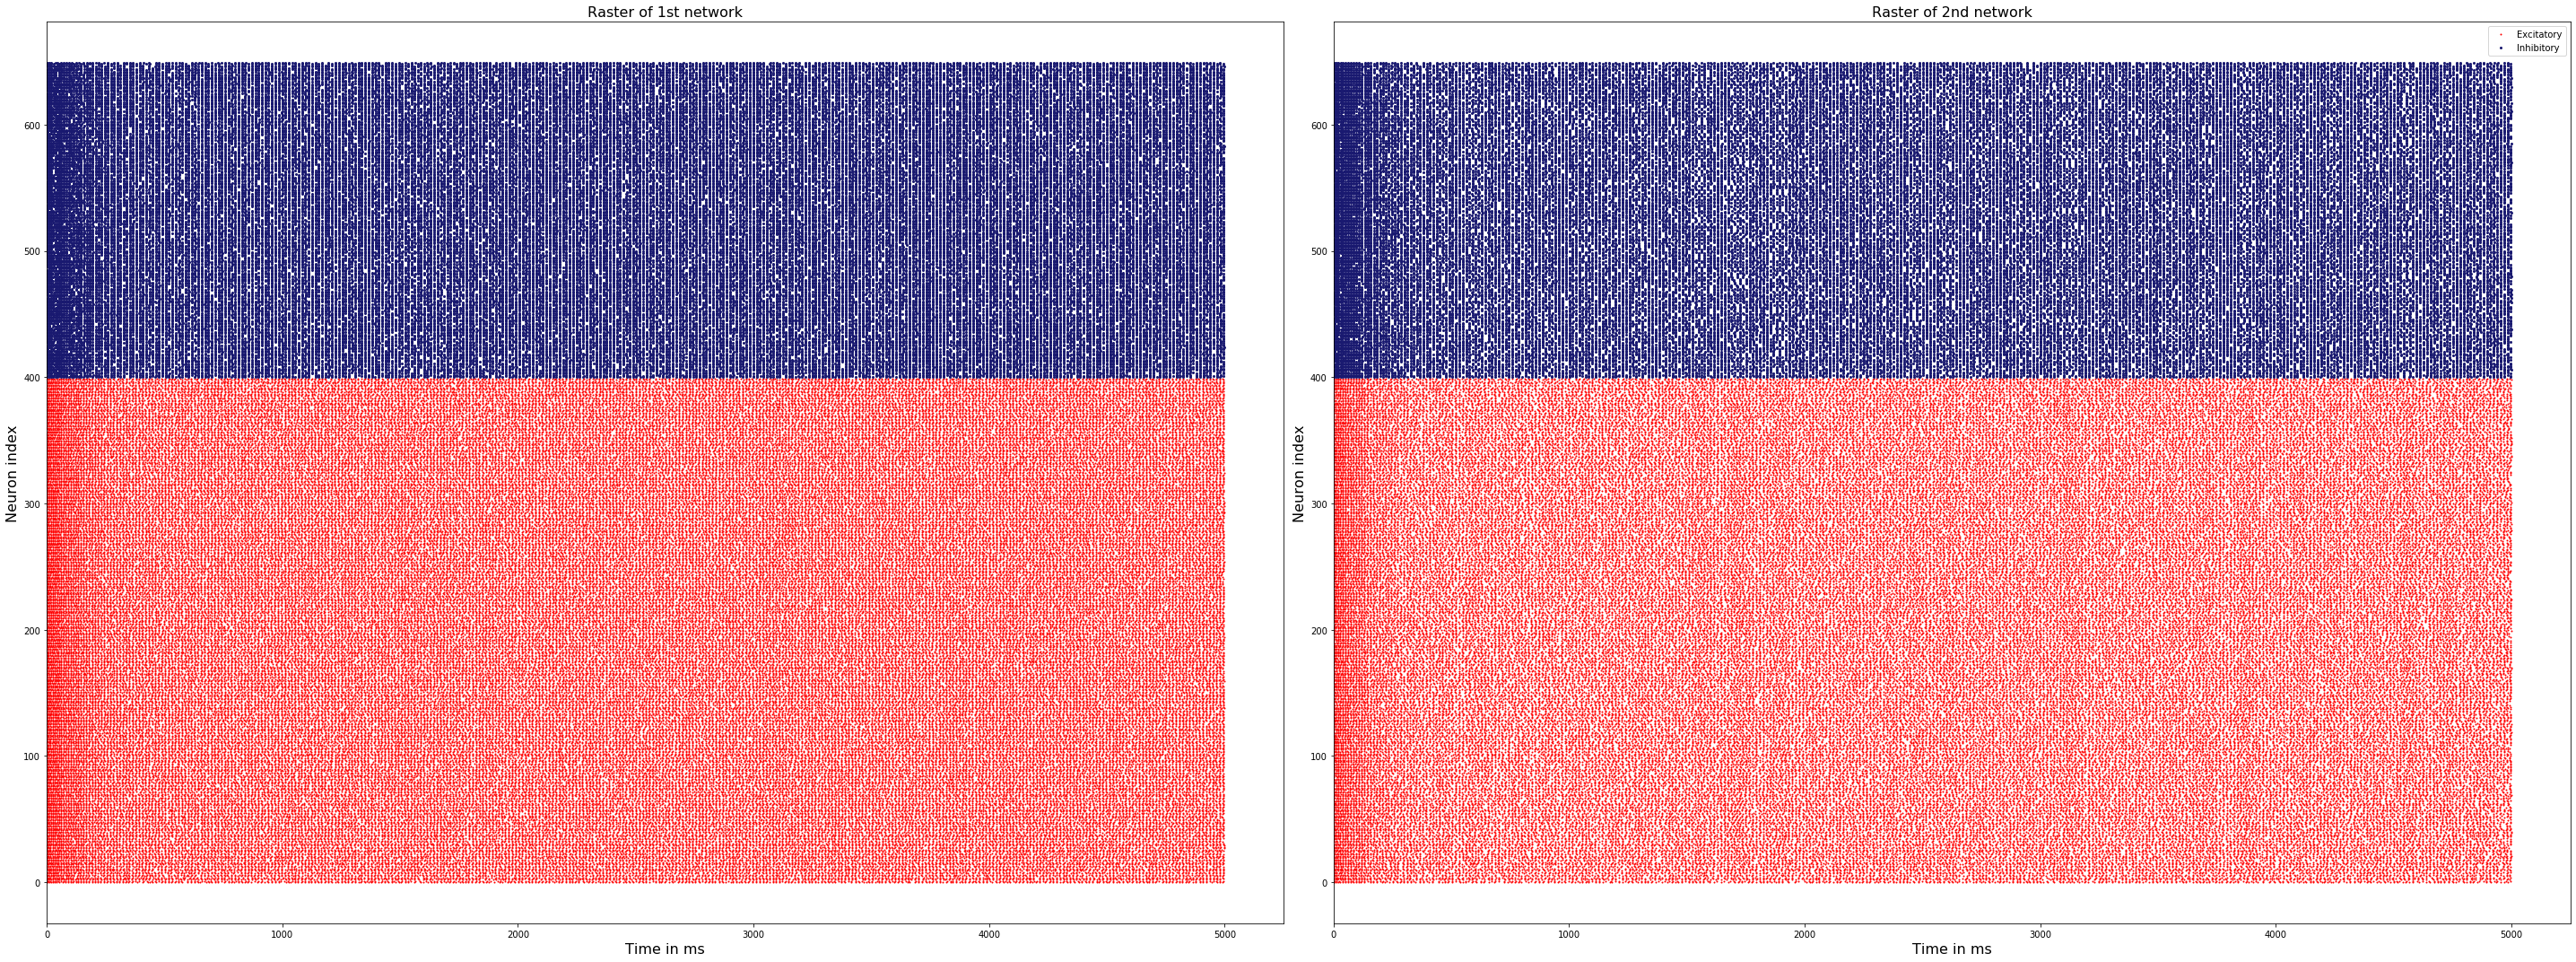

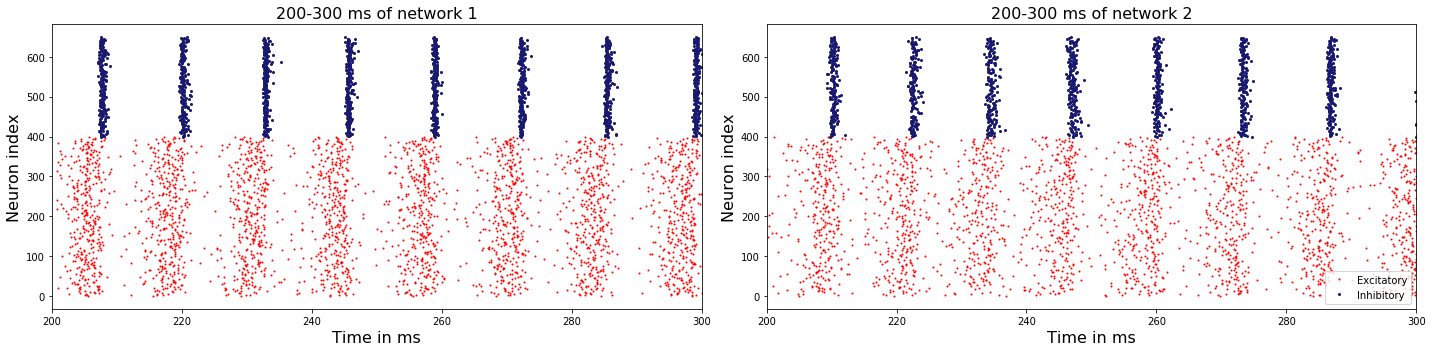

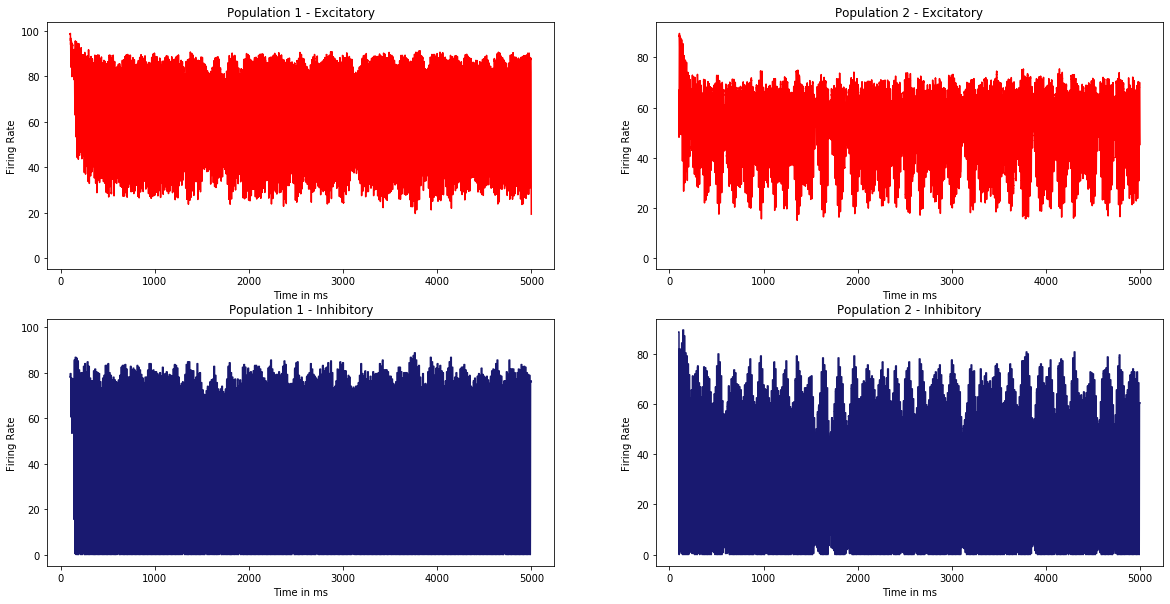

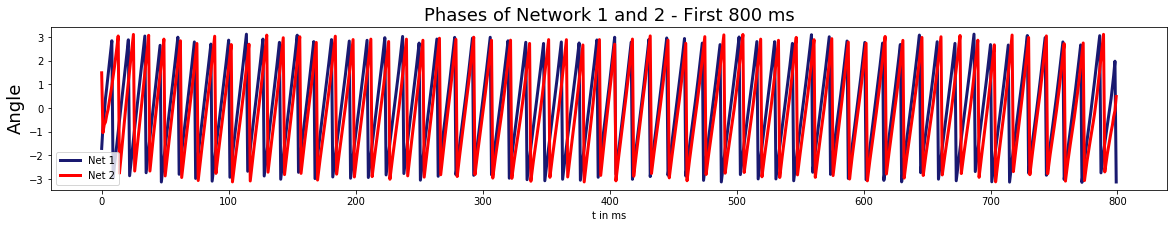

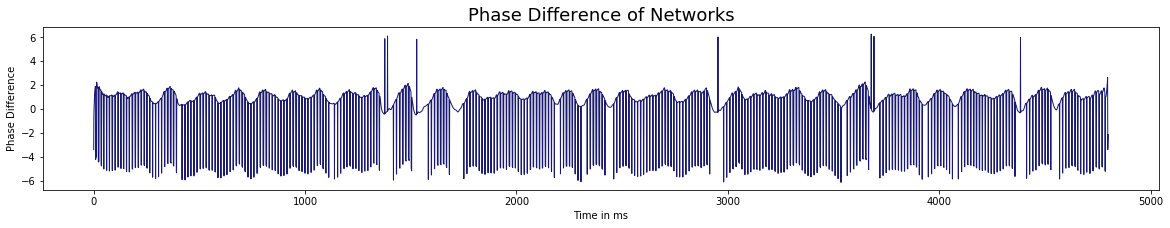

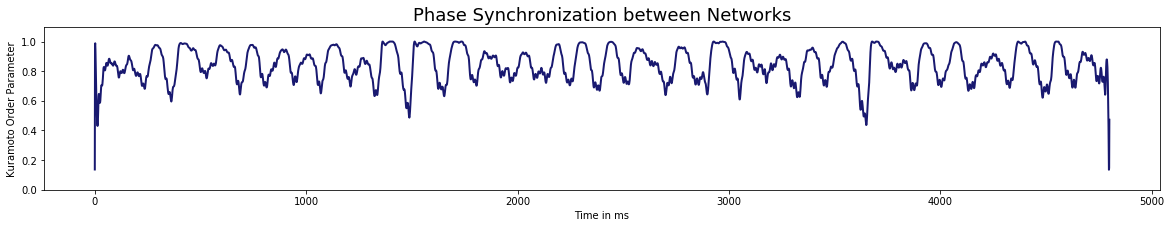

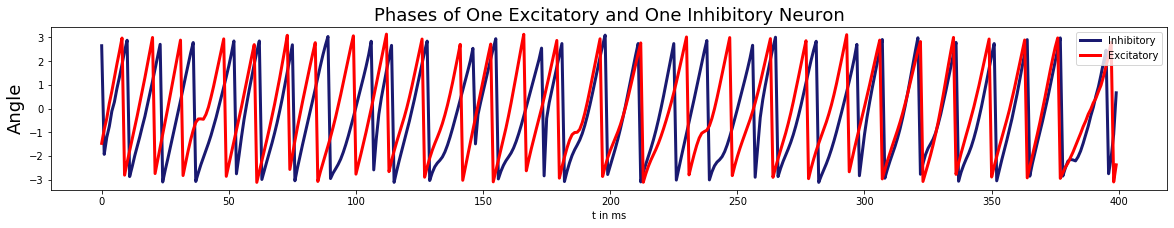

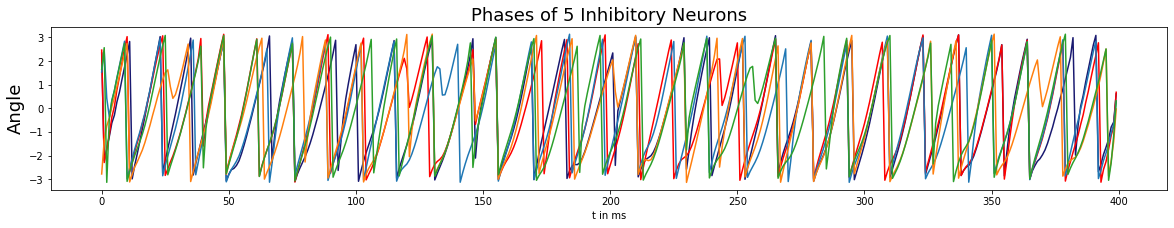

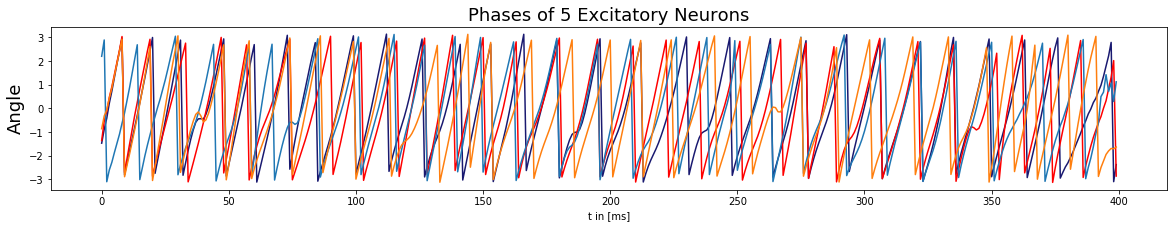

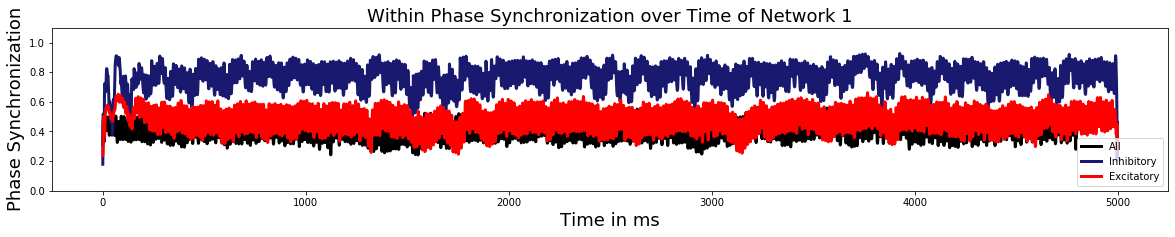

In [147]:
plots.plot_results(model, pop_rates=True, full_raster=True)

# Exploration

## Exploration of Noise Strength - 1d

In [149]:
exp_params = {
    "poisson_variance": np.arange(0.5, 8.0, 0.5),
}

ov_params = dict(params)
ov_params.update({
    "runtime": 3000.0,
    "poisson_p": 0.84,
})

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params, 
    default_params=ov_params,
    hdf_filename=constants.MODELS_PATH + "/PING_all_to_all.h5",
    exploration_name="exp_3"
)

In [150]:
ex.run()

2020-07-22 16:13:04,537	INFO resource_spec.py:212 -- Starting Ray with 11.43 GiB memory available for workers and up to 5.72 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-22 16:13:04,782	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-07-22 16:13:04,958	INFO services.py:1165 -- View the Ray dashboard at localhost:8265
INFO:root:Starting 15 jobs.
100%|██████████| 15/15 [00:00<00:00, 1033.71it/s]
INFO:root:Runs took 0.018178939819335938 s to submit.
  0%|          | 0/15 [00:00<?, ?it/s]

(pid=14230) Starting simulation at t=0. s for a duration of 3. s
(pid=14233) Starting simulation at t=0. s for a duration of 3. s
(pid=14225) Starting simulation at t=0. s for a duration of 3. s
(pid=14228) Starting simulation at t=0. s for a duration of 3. s
(pid=14232) Starting simulation at t=0. s for a duration of 3. s
(pid=14224) Starting simulation at t=0. s for a duration of 3. s
(pid=14226) Starting simulation at t=0. s for a duration of 3. s
(pid=14227) Starting simulation at t=0. s for a duration of 3. s
(pid=14230) 272.45 ms (9%) simulated in 10s, estimated 1m 40s remaining.
(pid=14233) 274.8 ms (9%) simulated in 10s, estimated 1m 39s remaining.
(pid=14225) 271.45 ms (9%) simulated in 10s, estimated 1m 41s remaining.
(pid=14228) 271.85 ms (9%) simulated in 10s, estimated 1m 40s remaining.
(pid=14223) Starting simulation at t=0. s for a duration of 3. s
(pid=14232) 267.65 ms (8%) simulated in 10s, estimated 1m 42s remaining.
(pid=14224) 255.35 ms (8%) simulated in 10s, estima

  7%|▋         | 1/15 [03:42<51:49, 222.14s/it]

(pid=14225) Starting simulation at t=0. s for a duration of 3. s
(pid=14231) 2.85425 s (95%) simulated in 2m 50s, estimated 9s remaining.
(pid=14229) 2.90005 s (96%) simulated in 2m 50s, estimated 6s remaining.
(pid=14234) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=14234) 3. s (100%) simulated in 2m 55s
(pid=14223) 3. s (100%) simulated in 2m 59s
(pid=14223) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=14229) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=14229) 3. s (100%) simulated in 2m 54s


 13%|█▎        | 2/15 [03:49<34:10, 157.72s/it]

(pid=14231) 3. s (100%) simulated in 2m 57s
(pid=14231) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=14225) 208.75 ms (6%) simulated in 10s, estimated 2m 14s remaining.


 33%|███▎      | 5/15 [04:00<09:19, 55.97s/it] 

(pid=14233) Starting simulation at t=0. s for a duration of 3. s


 53%|█████▎    | 8/15 [04:02<02:16, 19.53s/it]

(pid=14225) 0.48725 s (16%) simulated in 20s, estimated 1m 43s remaining.


 80%|████████  | 12/15 [04:04<00:15,  5.08s/it]

(pid=14233) 265. ms (8%) simulated in 10s, estimated 1m 43s remaining.
(pid=14225) 0.7561 s (25%) simulated in 30s, estimated 1m 29s remaining.
(pid=14233) 0.58445 s (19%) simulated in 20s, estimated 1m 23s remaining.
(pid=14225) 1.0937 s (36%) simulated in 40s, estimated 1m 10s remaining.
(pid=14239) Starting simulation at t=0. s for a duration of 3. s
(pid=14233) 0.9256 s (30%) simulated in 30s, estimated 1m 7s remaining.
(pid=14225) 1.4354 s (47%) simulated in 50s, estimated 55s remaining.
(pid=14239) 257.6 ms (8%) simulated in 10s, estimated 1m 46s remaining.
(pid=14233) 1.18535 s (39%) simulated in 40s, estimated 1m 1s remaining.
(pid=14225) 1.68865 s (56%) simulated in 1m 0s, estimated 47s remaining.
(pid=14239) 0.6185 s (20%) simulated in 20s, estimated 1m 17s remaining.
(pid=14233) 1.54835 s (51%) simulated in 50s, estimated 47s remaining.
(pid=14225) 2.06695 s (68%) simulated in 1m 10s, estimated 32s remaining.
(pid=14239) 1.0578 s (35%) simulated in 30s, estimated 55s remaini

 87%|████████▋ | 13/15 [05:19<00:52, 26.14s/it]

(pid=14239) 2.5054 s (83%) simulated in 50s, estimated 10s remaining.
(pid=14239) 3. s (100%) simulated in 55s
(pid=14239) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]


100%|██████████| 15/15 [05:29<00:00, 21.96s/it]
INFO:root:Runs and storage took 329.3548150062561 s to complete.


In [151]:
ex.load_results(all=True)

INFO:root:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/PING_all_to_all.h5 opened for reading.
INFO:root:Gettings runs of exploration ``exp_3``
100%|██████████| 15/15 [00:02<00:00,  7.39it/s]
INFO:root:Creating new results DataFrame
INFO:root:Aggregating scalar results ...
100%|██████████| 15/15 [00:02<00:00,  7.36it/s]
INFO:root:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/PING_all_to_all.h5 closed.


### Results

{'J_etoe': 0.01,
 'J_etoi': 0.05,
 'J_itoe': 0.2,
 'J_itoi': 0.4,
 'J_ppee': 0.001,
 'J_ppei': 0.02,
 'N_pop': 2,
 'const_delay': 0.0,
 'net_record_spikes': 400,
 'ou_enabled': [False, False],
 'p_etoe': 1.0,
 'p_etoi': 1.0,
 'p_itoe': 1.0,
 'p_itoi': 1.0,
 'p_ppee': 1.0,
 'p_ppei': 1.0,
 'p_ppii': 0.0,
 'poisson_I_enabled': True,
 'poisson_I_ratio': 0.4,
 'poisson_enabled': [True, True],
 'poisson_mean_input': 300,
 'poisson_p': 0.84,
 'poisson_size': 800,
 'poisson_variance': 1.0,
 'runtime': 3000.0}


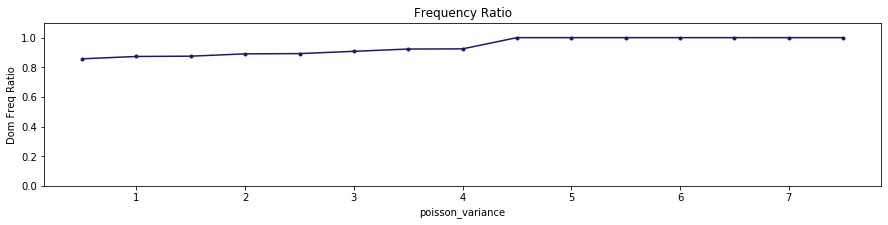

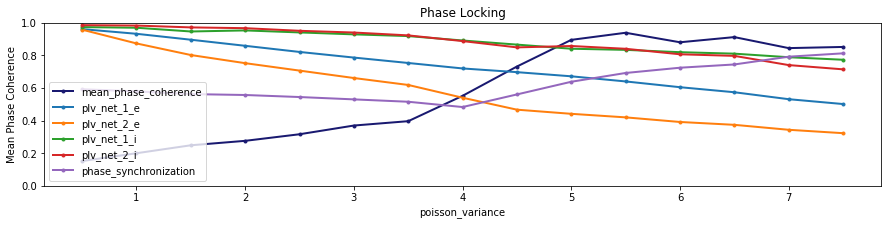

In [152]:
import pprint

plots.plot_exploration(ex, vmin_ratio=None, vmin_phase=None, vmax_phase=None)
pprint.pprint(ex.default_params)

## Exploration over noise strength and ratio - 2d

In [153]:
exp_params = {
    "poisson_variance": np.arange(0.5, 10.0, 0.5),
    "poisson_p": np.arange(0.7, 1.0, 0.05),
}

ov_params = dict(params)
ov_params.update({
    "runtime": 1000.0,
})

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params, 
    default_params=ov_params,
    hdf_filename=constants.MODELS_PATH + "/PING_synch_noise.h5",
    exploration_name="exp_2"
)

In [154]:
ex.run()

2020-07-22 16:19:09,284	INFO resource_spec.py:212 -- Starting Ray with 15.58 GiB memory available for workers and up to 7.79 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-22 16:19:09,525	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-07-22 16:19:09,683	INFO services.py:1165 -- View the Ray dashboard at localhost:8265
INFO:root:Starting 133 jobs.
100%|██████████| 133/133 [00:00<00:00, 395.09it/s]
INFO:root:Runs took 0.339832067489624 s to submit.
  0%|          | 0/133 [00:00<?, ?it/s]

(pid=14618) Starting simulation at t=0. s for a duration of 1. s
(pid=14617) Starting simulation at t=0. s for a duration of 1. s
(pid=14612) Starting simulation at t=0. s for a duration of 1. s
(pid=14615) Starting simulation at t=0. s for a duration of 1. s
(pid=14621) Starting simulation at t=0. s for a duration of 1. s
(pid=14613) Starting simulation at t=0. s for a duration of 1. s
(pid=14616) Starting simulation at t=0. s for a duration of 1. s
(pid=14611) Starting simulation at t=0. s for a duration of 1. s
(pid=14614) Starting simulation at t=0. s for a duration of 1. s
(pid=14618) 0.3452 s (34%) simulated in 10s, estimated 19s remaining.
(pid=14619) Starting simulation at t=0. s for a duration of 1. s
(pid=14617) 0.33615 s (33%) simulated in 10s, estimated 20s remaining.
(pid=14620) Starting simulation at t=0. s for a duration of 1. s
(pid=14622) Starting simulation at t=0. s for a duration of 1. s
(pid=14612) 0.34345 s (34%) simulated in 10s, estimated 19s remaining.
(pid=146

  3%|▎         | 4/133 [01:40<1:14:01, 34.43s/it]

(pid=14614) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=14614) 1. s (100%) simulated in 1m 6s
(pid=14619) 1. s (100%) simulated in 1m 7s
(pid=14619) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=14613) Starting simulation at t=0. s for a duration of 1. s
(pid=14616) Starting simulation at t=0. s for a duration of 1. s
(pid=14621) Starting simulation at t=0. s for a duration of 1. s
(pid=14620) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=14620) 1. s (100%) simulated in 1m 8s
(pid=14622) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=14622) 1. s (100%) simulated in 1m 8s
(pid=14617) Starting simulation at t=0. s for a duration of 1. s


  5%|▍         | 6/133 [01:50<39:56, 18.87s/it]  

(pid=14618) Starting simulation at t=0. s for a duration of 1. s


  7%|▋         | 9/133 [01:53<14:22,  6.95s/it]

(pid=14613) 199.95 ms (19%) simulated in 10s, estimated 40s remaining.
(pid=14616) 194.2 ms (19%) simulated in 10s, estimated 41s remaining.
(pid=14621) 200.7 ms (20%) simulated in 10s, estimated 40s remaining.


  8%|▊         | 10/133 [01:54<11:00,  5.37s/it]

(pid=14611) Starting simulation at t=0. s for a duration of 1. s


  9%|▉         | 12/133 [01:55<05:41,  2.82s/it]

(pid=14617) 188.4 ms (18%) simulated in 10s, estimated 43s remaining.
(pid=14619) Starting simulation at t=0. s for a duration of 1. s
(pid=14620) Starting simulation at t=0. s for a duration of 1. s
(pid=14622) Starting simulation at t=0. s for a duration of 1. s
(pid=14618) 216.35 ms (21%) simulated in 10s, estimated 36s remaining.
(pid=14613) 0.43405 s (43%) simulated in 20s, estimated 26s remaining.
(pid=14616) 0.4219 s (42%) simulated in 20s, estimated 27s remaining.
(pid=14621) 0.43025 s (43%) simulated in 20s, estimated 26s remaining.
(pid=14611) 231.5 ms (23%) simulated in 10s, estimated 33s remaining.
(pid=14617) 0.42975 s (42%) simulated in 20s, estimated 27s remaining.
(pid=14619) 251.95 ms (25%) simulated in 10s, estimated 30s remaining.
(pid=14620) 259.15 ms (25%) simulated in 10s, estimated 29s remaining.
(pid=14622) 260.35 ms (26%) simulated in 10s, estimated 28s remaining.
(pid=14618) 0.47095 s (47%) simulated in 20s, estimated 22s remaining.
(pid=14613) 0.7 s (70%) sim

 11%|█         | 14/133 [02:42<22:19, 11.26s/it]

(pid=14613) 171.8 ms (17%) simulated in 10s, estimated 48s remaining.
(pid=14627) 0.3851 s (38%) simulated in 20s, estimated 32s remaining.
(pid=14621) 171.9 ms (17%) simulated in 10s, estimated 48s remaining.
(pid=14616) 175.2 ms (17%) simulated in 10s, estimated 47s remaining.
(pid=14626) 0.37325 s (37%) simulated in 20s, estimated 34s remaining.
(pid=14617) Starting simulation at t=0. s for a duration of 1. s
(pid=14628) 0.6367 s (63%) simulated in 30s, estimated 17s remaining.
(pid=14620) Starting simulation at t=0. s for a duration of 1. s
(pid=14613) 0.37265 s (37%) simulated in 20s, estimated 34s remaining.
(pid=14627) 0.59175 s (59%) simulated in 30s, estimated 21s remaining.
(pid=14621) 0.38005 s (38%) simulated in 20s, estimated 33s remaining.
(pid=14616) 0.38415 s (38%) simulated in 20s, estimated 32s remaining.
(pid=14626) 0.57285 s (57%) simulated in 30s, estimated 22s remaining.
(pid=14618) Starting simulation at t=0. s for a duration of 1. s
(pid=14617) 199.25 ms (19%) s

 11%|█▏        | 15/133 [03:15<35:16, 17.93s/it]

(pid=14613) 0.84005 s (84%) simulated in 40s, estimated 8s remaining.
(pid=14626) 1. s (100%) simulated in 48s
(pid=14626) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=14621) 0.8473 s (84%) simulated in 40s, estimated 7s remaining.
(pid=14616) 0.8577 s (85%) simulated in 40s, estimated 7s remaining.
(pid=14618) 0.48785 s (48%) simulated in 20s, estimated 21s remaining.
(pid=14617) 0.68275 s (68%) simulated in 30s, estimated 14s remaining.
(pid=14611) 0.4835 s (48%) simulated in 20s, estimated 21s remaining.


 14%|█▍        | 19/133 [03:21<09:32,  5.02s/it]

(pid=14613) 1. s (100%) simulated in 46s
(pid=14619) 0.49605 s (49%) simulated in 20s, estimated 20s remaining.
(pid=14620) 0.7101 s (71%) simulated in 30s, estimated 12s remaining.
(pid=14616) 1. s (100%) simulated in 45s
(pid=14621) 1. s (100%) simulated in 45s


 18%|█▊        | 24/133 [03:24<02:02,  1.13s/it]

(pid=14622) 0.49695 s (49%) simulated in 20s, estimated 20s remaining.


 19%|█▉        | 25/133 [03:29<04:09,  2.31s/it]

(pid=14618) 0.74025 s (74%) simulated in 30s, estimated 11s remaining.
(pid=14617) 0.93065 s (93%) simulated in 40s, estimated 3s remaining.


 20%|█▉        | 26/133 [03:29<03:15,  1.83s/it]

(pid=14611) 0.7328 s (73%) simulated in 30s, estimated 11s remaining.


 20%|██        | 27/133 [03:30<02:22,  1.34s/it]

(pid=14619) 0.74545 s (74%) simulated in 30s, estimated 10s remaining.
(pid=14617) 1. s (100%) simulated in 42s
(pid=14620) 0.95415 s (95%) simulated in 40s, estimated 2s remaining.
(pid=14613) Starting simulation at t=0. s for a duration of 1. s
(pid=14622) 0.7362 s (73%) simulated in 30s, estimated 11s remaining.
(pid=14621) Starting simulation at t=0. s for a duration of 1. s
(pid=14616) Starting simulation at t=0. s for a duration of 1. s
(pid=14620) 1. s (100%) simulated in 42s
(pid=14627) Starting simulation at t=0. s for a duration of 1. s
(pid=14618) 0.97575 s (97%) simulated in 40s, estimated 1s remaining.
(pid=14628) Starting simulation at t=0. s for a duration of 1. s
(pid=14611) 0.9714 s (97%) simulated in 40s, estimated 1s remaining.


 21%|██        | 28/133 [03:39<06:53,  3.93s/it]

(pid=14618) 1. s (100%) simulated in 41s
(pid=14611) 1. s (100%) simulated in 41s
(pid=14619) 0.98585 s (98%) simulated in 40s, estimated 1s remaining.
(pid=14619) 1. s (100%) simulated in 40s
(pid=14613) 236.15 ms (23%) simulated in 10s, estimated 32s remaining.
(pid=14622) 0.97875 s (97%) simulated in 40s, estimated 1s remaining.
(pid=14621) 236.15 ms (23%) simulated in 10s, estimated 32s remaining.
(pid=14616) 235.2 ms (23%) simulated in 10s, estimated 33s remaining.
(pid=14622) 1. s (100%) simulated in 40s
(pid=14620) Starting simulation at t=0. s for a duration of 1. s
(pid=14626) Starting simulation at t=0. s for a duration of 1. s


 23%|██▎       | 30/133 [03:48<06:32,  3.81s/it]

(pid=14627) 234.15 ms (23%) simulated in 10s, estimated 33s remaining.
(pid=14628) 227.7 ms (22%) simulated in 10s, estimated 34s remaining.


 25%|██▍       | 33/133 [03:52<03:41,  2.21s/it]

(pid=14613) 0.4767 s (47%) simulated in 20s, estimated 22s remaining.
(pid=14621) 0.4769 s (47%) simulated in 20s, estimated 22s remaining.
(pid=14616) 0.47515 s (47%) simulated in 20s, estimated 22s remaining.
(pid=14617) Starting simulation at t=0. s for a duration of 1. s
(pid=14620) 230.1 ms (23%) simulated in 10s, estimated 33s remaining.
(pid=14626) 231.9 ms (23%) simulated in 10s, estimated 33s remaining.
(pid=14622) Starting simulation at t=0. s for a duration of 1. s
(pid=14627) 0.46865 s (46%) simulated in 20s, estimated 23s remaining.
(pid=14628) 0.4577 s (45%) simulated in 20s, estimated 24s remaining.
(pid=14618) Starting simulation at t=0. s for a duration of 1. s
(pid=14611) Starting simulation at t=0. s for a duration of 1. s
(pid=14613) 0.7112 s (71%) simulated in 30s, estimated 12s remaining.
(pid=14621) 0.7116 s (71%) simulated in 30s, estimated 12s remaining.
(pid=14616) 0.71095 s (71%) simulated in 30s, estimated 12s remaining.
(pid=14617) 225.55 ms (22%) simulated

 26%|██▋       | 35/133 [04:30<14:56,  9.15s/it]

(pid=14618) 0.6876 s (68%) simulated in 30s, estimated 14s remaining.
(pid=14611) 0.69365 s (69%) simulated in 30s, estimated 13s remaining.
(pid=14617) 0.91375 s (91%) simulated in 40s, estimated 4s remaining.
(pid=14619) 0.67935 s (67%) simulated in 30s, estimated 14s remaining.
(pid=14622) 0.91935 s (91%) simulated in 40s, estimated 4s remaining.


 27%|██▋       | 36/133 [04:38<13:57,  8.63s/it]

(pid=14617) 1. s (100%) simulated in 43s
(pid=14613) Starting simulation at t=0. s for a duration of 1. s


 29%|██▉       | 39/133 [04:39<04:55,  3.15s/it]

(pid=14616) Starting simulation at t=0. s for a duration of 1. s
(pid=14622) 1. s (100%) simulated in 43s
(pid=14620) Starting simulation at t=0. s for a duration of 1. s
(pid=14618) 0.90135 s (90%) simulated in 40s, estimated 4s remaining.
(pid=14611) 0.91395 s (91%) simulated in 40s, estimated 4s remaining.
(pid=14619) 0.90745 s (90%) simulated in 40s, estimated 4s remaining.


 31%|███       | 41/133 [04:46<04:41,  3.06s/it]

(pid=14618) 1. s (100%) simulated in 43s
(pid=14611) 1. s (100%) simulated in 43s
(pid=14619) 1. s (100%) simulated in 43s
(pid=14613) 240.45 ms (24%) simulated in 10s, estimated 32s remaining.
(pid=14621) Starting simulation at t=0. s for a duration of 1. s
(pid=14616) 250.1 ms (25%) simulated in 10s, estimated 30s remaining.
(pid=14620) 256.05 ms (25%) simulated in 10s, estimated 29s remaining.
(pid=14622) Starting simulation at t=0. s for a duration of 1. s


 32%|███▏      | 43/133 [04:53<04:35,  3.06s/it]

(pid=14627) Starting simulation at t=0. s for a duration of 1. s
(pid=14626) Starting simulation at t=0. s for a duration of 1. s


 34%|███▍      | 45/133 [04:55<02:49,  1.93s/it]

(pid=14628) Starting simulation at t=0. s for a duration of 1. s
(pid=14613) 0.5062 s (50%) simulated in 20s, estimated 20s remaining.
(pid=14621) 260.5 ms (26%) simulated in 10s, estimated 28s remaining.
(pid=14617) Starting simulation at t=0. s for a duration of 1. s
(pid=14616) 0.5179 s (51%) simulated in 20s, estimated 19s remaining.
(pid=14620) 0.52575 s (52%) simulated in 20s, estimated 18s remaining.
(pid=14622) 258.8 ms (25%) simulated in 10s, estimated 29s remaining.
(pid=14627) 250.2 ms (25%) simulated in 10s, estimated 30s remaining.
(pid=14626) 245. ms (24%) simulated in 10s, estimated 31s remaining.
(pid=14628) 250.5 ms (25%) simulated in 10s, estimated 30s remaining.
(pid=14618) Starting simulation at t=0. s for a duration of 1. s
(pid=14611) Starting simulation at t=0. s for a duration of 1. s
(pid=14613) 0.74165 s (74%) simulated in 30s, estimated 10s remaining.
(pid=14621) 0.4934 s (49%) simulated in 20s, estimated 21s remaining.
(pid=14619) Starting simulation at t=0.

 35%|███▍      | 46/133 [05:38<20:36, 14.21s/it]

(pid=14621) 0.9385 s (93%) simulated in 50s, estimated 3s remaining.
(pid=14619) 0.44315 s (44%) simulated in 30s, estimated 38s remaining.
(pid=14617) 0.6562 s (65%) simulated in 40s, estimated 21s remaining.
(pid=14622) 0.90145 s (90%) simulated in 50s, estimated 5s remaining.
(pid=14621) 1. s (100%) simulated in 54s
(pid=14627) 0.8699 s (86%) simulated in 50s, estimated 7s remaining.
(pid=14626) 0.8601 s (86%) simulated in 50s, estimated 8s remaining.
(pid=14628) 0.8581 s (85%) simulated in 50s, estimated 8s remaining.
(pid=14618) 0.5907 s (59%) simulated in 40s, estimated 28s remaining.
(pid=14611) 0.5881 s (58%) simulated in 40s, estimated 28s remaining.
(pid=14622) 1. s (100%) simulated in 56s
(pid=14619) 0.59445 s (59%) simulated in 40s, estimated 27s remaining.
(pid=14617) 0.80925 s (80%) simulated in 50s, estimated 12s remaining.
(pid=14627) 1. s (100%) simulated in 57s
(pid=14626) 1. s (100%) simulated in 57s
(pid=14628) 1. s (100%) simulated in 57s


 36%|███▌      | 48/133 [05:53<14:23, 10.16s/it]

(pid=14618) 0.804 s (80%) simulated in 50s, estimated 12s remaining.
(pid=14611) 0.799 s (79%) simulated in 50s, estimated 13s remaining.
(pid=14613) Starting simulation at t=0. s for a duration of 1. s
(pid=14617) 1. s (100%) simulated in 58s
(pid=14616) Starting simulation at t=0. s for a duration of 1. s


 37%|███▋      | 49/133 [05:59<12:23,  8.85s/it]

(pid=14619) 0.8178 s (81%) simulated in 50s, estimated 11s remaining.
(pid=14620) Starting simulation at t=0. s for a duration of 1. s


 39%|███▉      | 52/133 [06:01<04:42,  3.49s/it]

(pid=14622) Starting simulation at t=0. s for a duration of 1. s
(pid=14618) 1. s (100%) simulated in 59s


 40%|███▉      | 53/133 [06:06<05:16,  3.96s/it]

(pid=14611) 1. s (100%) simulated in 59s


 41%|████      | 54/133 [06:07<03:44,  2.85s/it]

(pid=14613) 206.6 ms (20%) simulated in 10s, estimated 38s remaining.
(pid=14619) 1. s (100%) simulated in 58s
(pid=14616) 209.8 ms (20%) simulated in 10s, estimated 38s remaining.
(pid=14620) 197.8 ms (19%) simulated in 10s, estimated 41s remaining.
(pid=14622) 200.8 ms (20%) simulated in 10s, estimated 40s remaining.


 43%|████▎     | 57/133 [06:16<03:22,  2.67s/it]

(pid=14613) 0.4098 s (40%) simulated in 20s, estimated 29s remaining.
(pid=14616) 0.41755 s (41%) simulated in 20s, estimated 28s remaining.
(pid=14620) 0.41095 s (41%) simulated in 20s, estimated 29s remaining.
(pid=14621) Starting simulation at t=0. s for a duration of 1. s
(pid=14627) Starting simulation at t=0. s for a duration of 1. s
(pid=14622) 0.4119 s (41%) simulated in 20s, estimated 29s remaining.
(pid=14617) Starting simulation at t=0. s for a duration of 1. s
(pid=14613) 0.5989 s (59%) simulated in 30s, estimated 20s remaining.
(pid=14628) Starting simulation at t=0. s for a duration of 1. s
(pid=14626) Starting simulation at t=0. s for a duration of 1. s
(pid=14616) 0.6068 s (60%) simulated in 30s, estimated 19s remaining.
(pid=14620) 0.59465 s (59%) simulated in 30s, estimated 20s remaining.
(pid=14621) 178.6 ms (17%) simulated in 10s, estimated 46s remaining.
(pid=14627) 182.05 ms (18%) simulated in 10s, estimated 45s remaining.
(pid=14622) 0.59625 s (59%) simulated in 

 44%|████▎     | 58/133 [07:07<21:27, 17.17s/it]

(pid=14626) 0.55785 s (55%) simulated in 40s, estimated 32s remaining.


 44%|████▍     | 59/133 [07:09<15:28, 12.54s/it]

(pid=14621) 0.71565 s (71%) simulated in 50s, estimated 20s remaining.
(pid=14627) 0.712 s (71%) simulated in 50s, estimated 20s remaining.


 45%|████▌     | 60/133 [07:12<11:50,  9.73s/it]

(pid=14618) 0.5265 s (52%) simulated in 40s, estimated 36s remaining.
(pid=14611) 0.5275 s (52%) simulated in 40s, estimated 36s remaining.
(pid=14617) 0.7054 s (70%) simulated in 50s, estimated 21s remaining.
(pid=14619) 0.53425 s (53%) simulated in 40s, estimated 35s remaining.
(pid=14628) 0.7124 s (71%) simulated in 50s, estimated 20s remaining.
(pid=14626) 0.71875 s (71%) simulated in 50s, estimated 20s remaining.
(pid=14622) Starting simulation at t=0. s for a duration of 1. s
(pid=14621) 0.8981 s (89%) simulated in 1m 0s, estimated 7s remaining.
(pid=14627) 0.9049 s (90%) simulated in 1m 0s, estimated 6s remaining.
(pid=14618) 0.7259 s (72%) simulated in 50s, estimated 19s remaining.
(pid=14611) 0.7258 s (72%) simulated in 50s, estimated 19s remaining.
(pid=14617) 0.90285 s (90%) simulated in 1m 0s, estimated 6s remaining.
(pid=14619) 0.73095 s (73%) simulated in 50s, estimated 18s remaining.
(pid=14621) 1. s (100%) simulated in 1m 5s
(pid=14627) 1. s (100%) simulated in 1m 5s
(p

 47%|████▋     | 63/133 [07:35<07:49,  6.71s/it]

(pid=14619) 0.9351 s (93%) simulated in 1m 0s, estimated 4s remaining.
(pid=14618) 1. s (100%) simulated in 1m 3s
(pid=14611) 1. s (100%) simulated in 1m 3s
(pid=14619) 1. s (100%) simulated in 1m 2s
(pid=14616) 207.25 ms (20%) simulated in 10s, estimated 38s remaining.
(pid=14613) Starting simulation at t=0. s for a duration of 1. s
(pid=14620) 202.65 ms (20%) simulated in 10s, estimated 39s remaining.
(pid=14622) 0.4089 s (40%) simulated in 20s, estimated 29s remaining.


 50%|████▉     | 66/133 [07:41<03:45,  3.37s/it]

(pid=14617) Starting simulation at t=0. s for a duration of 1. s


 52%|█████▏    | 69/133 [07:45<02:04,  1.94s/it]

(pid=14616) 0.4424 s (44%) simulated in 20s, estimated 25s remaining.
(pid=14613) 235.45 ms (23%) simulated in 10s, estimated 32s remaining.
(pid=14611) Starting simulation at t=0. s for a duration of 1. s
(pid=14620) 0.44925 s (44%) simulated in 20s, estimated 25s remaining.
(pid=14622) 0.65355 s (65%) simulated in 30s, estimated 16s remaining.
(pid=14619) Starting simulation at t=0. s for a duration of 1. s
(pid=14617) 249.1 ms (24%) simulated in 10s, estimated 30s remaining.
(pid=14618) Starting simulation at t=0. s for a duration of 1. s
(pid=14616) 0.70195 s (70%) simulated in 30s, estimated 13s remaining.
(pid=14621) Starting simulation at t=0. s for a duration of 1. s
(pid=14628) Starting simulation at t=0. s for a duration of 1. s
(pid=14613) 0.48895 s (48%) simulated in 20s, estimated 21s remaining.
(pid=14611) 248.15 ms (24%) simulated in 10s, estimated 30s remaining.
(pid=14627) Starting simulation at t=0. s for a duration of 1. s
(pid=14620) 0.7075 s (70%) simulated in 30s,

 55%|█████▍    | 73/133 [08:37<06:00,  6.00s/it]

(pid=14618) 0.74225 s (74%) simulated in 40s, estimated 14s remaining.
(pid=14621) 0.74065 s (74%) simulated in 40s, estimated 14s remaining.
(pid=14628) 0.72515 s (72%) simulated in 40s, estimated 15s remaining.
(pid=14611) 0.9809 s (98%) simulated in 50s, estimated 1s remaining.
(pid=14627) 0.7193 s (71%) simulated in 40s, estimated 16s remaining.
(pid=14619) 0.95565 s (95%) simulated in 50s, estimated 2s remaining.
(pid=14611) 1. s (100%) simulated in 51s
(pid=14619) 1. s (100%) simulated in 53s
(pid=14613) Starting simulation at t=0. s for a duration of 1. s
(pid=14626) 0.66815 s (66%) simulated in 40s, estimated 20s remaining.
(pid=14620) Starting simulation at t=0. s for a duration of 1. s
(pid=14618) 0.88595 s (88%) simulated in 50s, estimated 6s remaining.
(pid=14616) Starting simulation at t=0. s for a duration of 1. s
(pid=14621) 0.8847 s (88%) simulated in 50s, estimated 7s remaining.
(pid=14622) Starting simulation at t=0. s for a duration of 1. s
(pid=14628) 0.872 s (87%) 

 56%|█████▌    | 74/133 [09:04<11:58, 12.18s/it]

(pid=14613) 0.3599 s (35%) simulated in 20s, estimated 36s remaining.


 58%|█████▊    | 77/133 [09:06<04:10,  4.48s/it]

(pid=14620) 0.3827 s (38%) simulated in 20s, estimated 32s remaining.
(pid=14616) 0.39685 s (39%) simulated in 20s, estimated 30s remaining.
(pid=14622) 0.395 s (39%) simulated in 20s, estimated 31s remaining.
(pid=14617) 0.40475 s (40%) simulated in 20s, estimated 29s remaining.


 61%|██████    | 81/133 [09:11<01:31,  1.75s/it]

(pid=14613) 0.6257 s (62%) simulated in 30s, estimated 18s remaining.
(pid=14618) Starting simulation at t=0. s for a duration of 1. s
(pid=14620) 0.6538 s (65%) simulated in 30s, estimated 16s remaining.
(pid=14621) Starting simulation at t=0. s for a duration of 1. s
(pid=14616) 0.6697 s (66%) simulated in 30s, estimated 15s remaining.
(pid=14611) Starting simulation at t=0. s for a duration of 1. s
(pid=14622) 0.67155 s (67%) simulated in 30s, estimated 15s remaining.
(pid=14619) Starting simulation at t=0. s for a duration of 1. s
(pid=14617) 0.6853 s (68%) simulated in 30s, estimated 14s remaining.
(pid=14613) 0.92365 s (92%) simulated in 40s, estimated 3s remaining.
(pid=14613) 1. s (100%) simulated in 42s
(pid=14618) 285.05 ms (28%) simulated in 10s, estimated 25s remaining.
(pid=14620) 0.94445 s (94%) simulated in 40s, estimated 2s remaining.
(pid=14628) Starting simulation at t=0. s for a duration of 1. s
(pid=14621) 285.95 ms (28%) simulated in 10s, estimated 25s remaining.
(

 65%|██████▍   | 86/133 [09:37<01:44,  2.22s/it]

(pid=14618) 0.58065 s (58%) simulated in 20s, estimated 14s remaining.
(pid=14628) 287.95 ms (28%) simulated in 10s, estimated 25s remaining.
(pid=14621) 0.58385 s (58%) simulated in 20s, estimated 14s remaining.
(pid=14627) 293. ms (29%) simulated in 10s, estimated 24s remaining.
(pid=14611) 0.582 s (58%) simulated in 20s, estimated 14s remaining.
(pid=14626) 294.05 ms (29%) simulated in 10s, estimated 24s remaining.
(pid=14619) 0.5805 s (58%) simulated in 20s, estimated 14s remaining.
(pid=14617) Starting simulation at t=0. s for a duration of 1. s
(pid=14622) Starting simulation at t=0. s for a duration of 1. s
(pid=14613) Starting simulation at t=0. s for a duration of 1. s
(pid=14616) Starting simulation at t=0. s for a duration of 1. s
(pid=14618) 0.8802 s (88%) simulated in 30s, estimated 4s remaining.
(pid=14628) 0.5835 s (58%) simulated in 20s, estimated 14s remaining.
(pid=14620) Starting simulation at t=0. s for a duration of 1. s
(pid=14621) 0.88215 s (88%) simulated in 30s

 68%|██████▊   | 90/133 [10:02<02:21,  3.29s/it]

(pid=14613) 0.464 s (46%) simulated in 20s, estimated 23s remaining.
(pid=14621) Starting simulation at t=0. s for a duration of 1. s
(pid=14628) 1. s (100%) simulated in 39s
(pid=14627) 1. s (100%) simulated in 38s
(pid=14616) 0.4362 s (43%) simulated in 20s, estimated 26s remaining.
(pid=14626) 1. s (100%) simulated in 38s
(pid=14620) 0.43365 s (43%) simulated in 20s, estimated 26s remaining.
(pid=14617) 0.7097 s (70%) simulated in 30s, estimated 12s remaining.
(pid=14622) 0.70025 s (70%) simulated in 30s, estimated 13s remaining.
(pid=14613) 0.64705 s (64%) simulated in 30s, estimated 16s remaining.
(pid=14621) 175.9 ms (17%) simulated in 10s, estimated 47s remaining.


 69%|██████▉   | 92/133 [10:17<03:12,  4.70s/it]

(pid=14616) 0.61475 s (61%) simulated in 30s, estimated 19s remaining.


 70%|██████▉   | 93/133 [10:17<02:17,  3.44s/it]

(pid=14620) 0.61055 s (61%) simulated in 30s, estimated 19s remaining.
(pid=14618) Starting simulation at t=0. s for a duration of 1. s
(pid=14617) 0.88555 s (88%) simulated in 40s, estimated 5s remaining.
(pid=14611) Starting simulation at t=0. s for a duration of 1. s
(pid=14622) 0.8745 s (87%) simulated in 40s, estimated 6s remaining.
(pid=14619) Starting simulation at t=0. s for a duration of 1. s
(pid=14613) 0.83515 s (83%) simulated in 40s, estimated 8s remaining.
(pid=14617) 1. s (100%) simulated in 45s
(pid=14621) 0.3693 s (36%) simulated in 20s, estimated 34s remaining.
(pid=14622) 1. s (100%) simulated in 46s
(pid=14616) 0.8192 s (81%) simulated in 40s, estimated 9s remaining.
(pid=14620) 0.81355 s (81%) simulated in 40s, estimated 9s remaining.
(pid=14618) 200.5 ms (20%) simulated in 10s, estimated 40s remaining.
(pid=14611) 206.95 ms (20%) simulated in 10s, estimated 38s remaining.
(pid=14619) 213.2 ms (21%) simulated in 10s, estimated 37s remaining.
(pid=14613) 1. s (100%)

 71%|███████▏  | 95/133 [10:44<04:50,  7.65s/it]

(pid=14628) Starting simulation at t=0. s for a duration of 1. s


 72%|███████▏  | 96/133 [10:45<03:27,  5.61s/it]

(pid=14627) Starting simulation at t=0. s for a duration of 1. s


 74%|███████▎  | 98/133 [10:46<01:41,  2.91s/it]

(pid=14621) 0.8008 s (80%) simulated in 40s, estimated 10s remaining.
(pid=14613) Starting simulation at t=0. s for a duration of 1. s
(pid=14618) 0.6253 s (62%) simulated in 30s, estimated 18s remaining.
(pid=14626) 213.6 ms (21%) simulated in 10s, estimated 37s remaining.
(pid=14617) Starting simulation at t=0. s for a duration of 1. s
(pid=14616) Starting simulation at t=0. s for a duration of 1. s
(pid=14611) 0.63105 s (63%) simulated in 30s, estimated 18s remaining.
(pid=14620) Starting simulation at t=0. s for a duration of 1. s
(pid=14619) 0.6388 s (63%) simulated in 30s, estimated 17s remaining.
(pid=14622) Starting simulation at t=0. s for a duration of 1. s
(pid=14621) 1. s (100%) simulated in 48s
(pid=14628) 229.2 ms (22%) simulated in 10s, estimated 34s remaining.
(pid=14627) 234.35 ms (23%) simulated in 10s, estimated 33s remaining.
(pid=14613) 237.6 ms (23%) simulated in 10s, estimated 32s remaining.
(pid=14618) 0.8768 s (87%) simulated in 40s, estimated 6s remaining.
(pi

 74%|███████▍  | 99/133 [11:08<05:00,  8.84s/it]

(pid=14626) 0.74285 s (74%) simulated in 30s, estimated 10s remaining.


 75%|███████▌  | 100/133 [11:09<03:26,  6.26s/it]

(pid=14617) 0.5331 s (53%) simulated in 20s, estimated 18s remaining.
(pid=14616) 0.5389 s (53%) simulated in 20s, estimated 17s remaining.


 77%|███████▋  | 102/133 [11:10<01:45,  3.40s/it]

(pid=14620) 0.5357 s (53%) simulated in 20s, estimated 17s remaining.
(pid=14622) 0.5322 s (53%) simulated in 20s, estimated 18s remaining.
(pid=14628) 0.7681 s (76%) simulated in 30s, estimated 9s remaining.
(pid=14627) 0.78675 s (78%) simulated in 30s, estimated 8s remaining.
(pid=14613) 0.8006 s (80%) simulated in 30s, estimated 7s remaining.
(pid=14626) 1. s (100%) simulated in 39s
(pid=14617) 0.81955 s (81%) simulated in 30s, estimated 7s remaining.
(pid=14616) 0.8269 s (82%) simulated in 30s, estimated 6s remaining.
(pid=14620) 0.82785 s (82%) simulated in 30s, estimated 6s remaining.
(pid=14622) 0.8169 s (81%) simulated in 30s, estimated 7s remaining.
(pid=14618) Starting simulation at t=0. s for a duration of 1. s
(pid=14621) Starting simulation at t=0. s for a duration of 1. s
(pid=14611) Starting simulation at t=0. s for a duration of 1. s
(pid=14619) Starting simulation at t=0. s for a duration of 1. s
(pid=14628) 1. s (100%) simulated in 38s
(pid=14613) 1. s (100%) simulate

 78%|███████▊  | 104/133 [11:31<02:55,  6.06s/it]

(pid=14618) 225.05 ms (22%) simulated in 10s, estimated 34s remaining.


 79%|███████▉  | 105/133 [11:31<02:01,  4.35s/it]

(pid=14621) 221.5 ms (22%) simulated in 10s, estimated 35s remaining.
(pid=14611) 217.4 ms (21%) simulated in 10s, estimated 36s remaining.
(pid=14619) 213.35 ms (21%) simulated in 10s, estimated 37s remaining.


 83%|████████▎ | 110/133 [11:37<00:30,  1.32s/it]

(pid=14620) Starting simulation at t=0. s for a duration of 1. s
(pid=14622) Starting simulation at t=0. s for a duration of 1. s
(pid=14618) 0.45235 s (45%) simulated in 20s, estimated 24s remaining.
(pid=14621) 0.45215 s (45%) simulated in 20s, estimated 24s remaining.
(pid=14611) 0.45155 s (45%) simulated in 20s, estimated 24s remaining.
(pid=14619) 0.447 s (44%) simulated in 20s, estimated 25s remaining.
(pid=14617) Starting simulation at t=0. s for a duration of 1. s
(pid=14628) Starting simulation at t=0. s for a duration of 1. s
(pid=14620) 238.7 ms (23%) simulated in 10s, estimated 32s remaining.
(pid=14627) Starting simulation at t=0. s for a duration of 1. s
(pid=14626) Starting simulation at t=0. s for a duration of 1. s
(pid=14622) 227.8 ms (22%) simulated in 10s, estimated 34s remaining.
(pid=14618) 0.6852 s (68%) simulated in 30s, estimated 14s remaining.
(pid=14621) 0.6824 s (68%) simulated in 30s, estimated 14s remaining.
(pid=14611) 0.68385 s (68%) simulated in 30s, es

 86%|████████▌ | 114/133 [12:13<01:17,  4.10s/it]

(pid=14613) 0.50235 s (50%) simulated in 20s, estimated 20s remaining.
(pid=14616) 0.5034 s (50%) simulated in 20s, estimated 20s remaining.
(pid=14617) 0.7468 s (74%) simulated in 30s, estimated 10s remaining.
(pid=14620) 1. s (100%) simulated in 39s
(pid=14628) 0.74225 s (74%) simulated in 30s, estimated 10s remaining.
(pid=14627) 0.76005 s (76%) simulated in 30s, estimated 9s remaining.
(pid=14626) 0.75315 s (75%) simulated in 30s, estimated 10s remaining.
(pid=14622) 0.9943 s (99%) simulated in 40s, estimated < 1s remaining.
(pid=14622) 1. s (100%) simulated in 40s
(pid=14621) Starting simulation at t=0. s for a duration of 1. s
(pid=14613) 0.7705 s (77%) simulated in 30s, estimated 9s remaining.
(pid=14616) 0.76465 s (76%) simulated in 30s, estimated 9s remaining.
(pid=14617) 0.97075 s (97%) simulated in 40s, estimated 1s remaining.
(pid=14628) 0.95485 s (95%) simulated in 40s, estimated 2s remaining.
(pid=14627) 0.9697 s (96%) simulated in 40s, estimated 1s remaining.
(pid=14617)

 87%|████████▋ | 116/133 [12:42<02:21,  8.32s/it]

(pid=14621) 0.37515 s (37%) simulated in 20s, estimated 33s remaining.
(pid=14620) Starting simulation at t=0. s for a duration of 1. s
(pid=14619) 209.25 ms (20%) simulated in 10s, estimated 38s remaining.
(pid=14622) Starting simulation at t=0. s for a duration of 1. s
(pid=14611) 211.1 ms (21%) simulated in 10s, estimated 37s remaining.


 88%|████████▊ | 117/133 [12:47<01:56,  7.27s/it]

(pid=14618) 214.15 ms (21%) simulated in 10s, estimated 37s remaining.


 92%|█████████▏| 122/133 [12:49<00:15,  1.43s/it]

(pid=14613) Starting simulation at t=0. s for a duration of 1. s
(pid=14621) 0.6292 s (62%) simulated in 30s, estimated 18s remaining.
(pid=14620) 258.8 ms (25%) simulated in 10s, estimated 29s remaining.
(pid=14617) Starting simulation at t=0. s for a duration of 1. s
(pid=14626) Starting simulation at t=0. s for a duration of 1. s
(pid=14619) 0.4738 s (47%) simulated in 20s, estimated 22s remaining.
(pid=14622) 262.25 ms (26%) simulated in 10s, estimated 28s remaining.
(pid=14611) 0.4762 s (47%) simulated in 20s, estimated 22s remaining.
(pid=14618) 0.4786 s (47%) simulated in 20s, estimated 22s remaining.
(pid=14613) 245.35 ms (24%) simulated in 10s, estimated 31s remaining.
(pid=14621) 0.87725 s (87%) simulated in 40s, estimated 6s remaining.
(pid=14620) 0.49605 s (49%) simulated in 20s, estimated 20s remaining.
(pid=14617) 228.95 ms (22%) simulated in 10s, estimated 34s remaining.
(pid=14627) Starting simulation at t=0. s for a duration of 1. s
(pid=14626) 226.25 ms (22%) simulate

 93%|█████████▎| 124/133 [13:25<01:14,  8.30s/it]

(pid=14617) 0.7634 s (76%) simulated in 30s, estimated 9s remaining.


 95%|█████████▍| 126/133 [13:25<00:29,  4.15s/it]

(pid=14627) 0.53625 s (53%) simulated in 20s, estimated 17s remaining.
(pid=14622) 1. s (100%) simulated in 38s
(pid=14626) 0.7841 s (78%) simulated in 30s, estimated 8s remaining.
(pid=14628) 0.55785 s (55%) simulated in 20s, estimated 16s remaining.


 95%|█████████▌| 127/133 [13:28<00:22,  3.73s/it]

(pid=14613) 1. s (100%) simulated in 36s


 96%|█████████▌| 128/133 [13:29<00:14,  2.99s/it]

(pid=14626) 1. s (100%) simulated in 34s
(pid=14617) 1. s (100%) simulated in 35s


 97%|█████████▋| 129/133 [13:33<00:13,  3.29s/it]

(pid=14627) 1. s (100%) simulated in 28s
(pid=14628) 1. s (100%) simulated in 28s


100%|██████████| 133/133 [13:37<00:00,  6.15s/it]
INFO:root:Runs and storage took 817.6228148937225 s to complete.


In [155]:
ex.load_results(all=True)

INFO:root:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/PING_synch_noise.h5 opened for reading.
INFO:root:Gettings runs of exploration ``exp_2``
100%|██████████| 133/133 [00:14<00:00,  9.19it/s]
INFO:root:Creating new results DataFrame
INFO:root:Aggregating scalar results ...
100%|██████████| 133/133 [00:13<00:00,  9.58it/s]
INFO:root:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/PING_synch_noise.h5 closed.


### Results

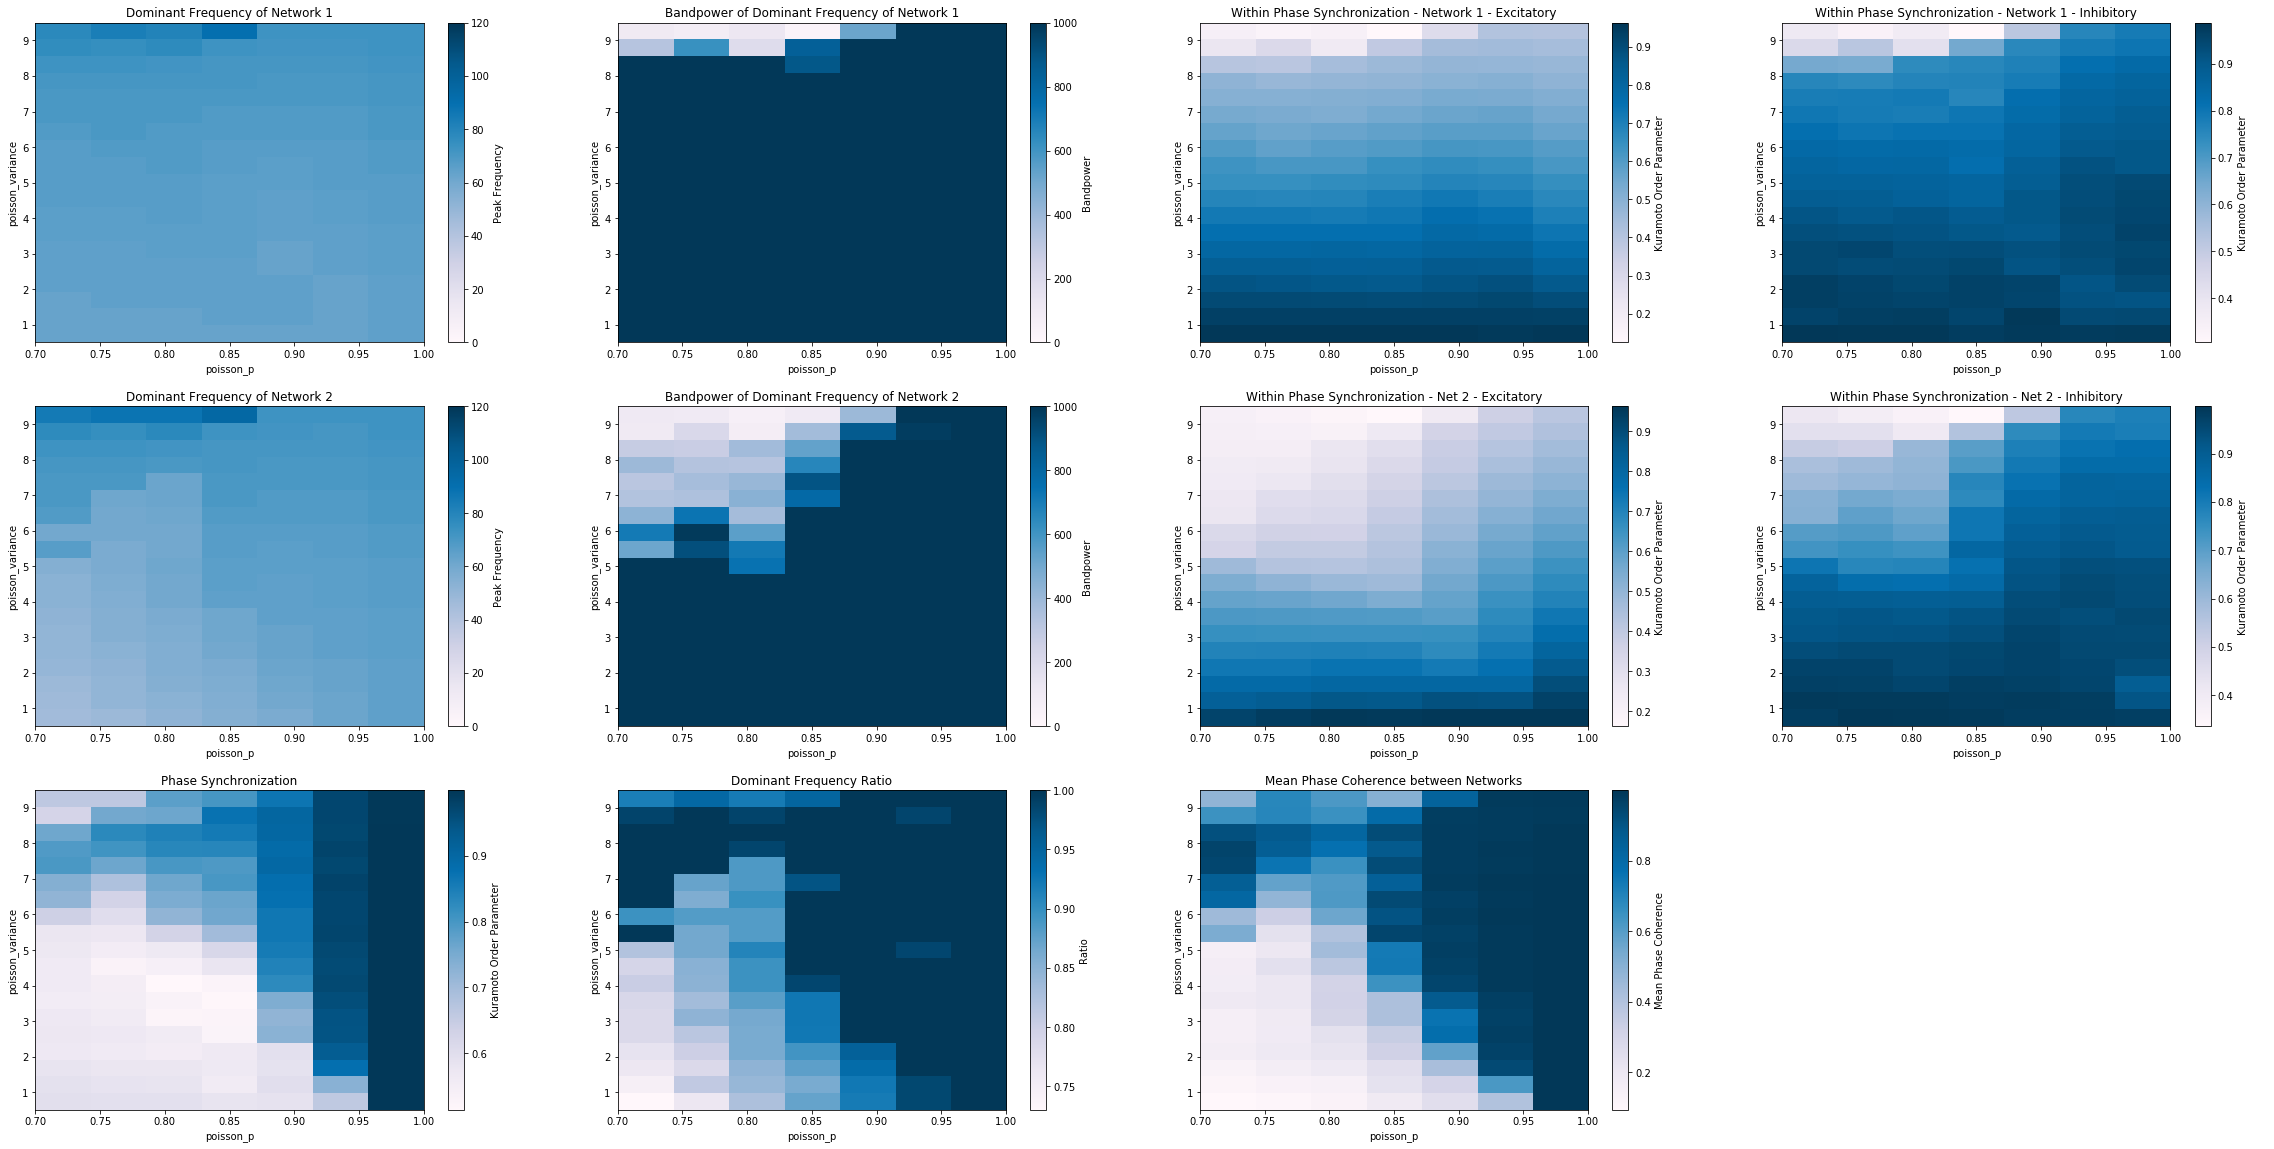

In [156]:
plots.plot_exploration(ex, vmin_ratio=None, vmin_phase=None, vmax_phase=None)